In [269]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#
#
# Problem 1a: Cancer SVM Classifier w/ 
#               Feature Extraction and Standardization
#
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancerData = cancer.data
cancerTable = pd.DataFrame(cancerData)
cancerTable.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [270]:
diag = cancer.target
diag[:5]

array([0, 0, 0, 0, 0])

In [271]:
diag = np.reshape(diag,(569,1))
finalCancerData = np.concatenate([cancerData,diag], axis=1)
finalCancerData.shape

(569, 31)

In [272]:
finalCancerTable = pd.DataFrame(finalCancerData)
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [273]:
finalFeatures = np.append(features, 'diagnosis')
finalCancerTable.columns = finalFeatures
finalCancerTable.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [274]:
X = finalCancerTable.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values
Y = finalCancerTable.iloc[:, 30].values #no need to standardize since they're just 0 or 1
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [275]:
# Standardize x data first
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

standard = StandardScaler()
stdX = standard.fit_transform(X)  
print('All standardized x data:')
stdX[:5]

All standardized x data:


array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [276]:
from sklearn.decomposition import PCA

accuracyHistory = np.zeros(31)
precisionHistory = np.zeros(31)
recallHistory = np.zeros(31)
# Big for loop for finding best K component reduction
for i in range(1,31):
    pca = PCA(n_components=i)                   #reduce to i number of components/variables
    principalComps = pca.fit_transform(stdX)    #feed stdized x data to get i principal components
    
    np.random.seed(0) #split new components and Y datas into training and validation sets
    trainX, validX, trainY, validY = train_test_split(principalComps, Y, test_size = 0.2, random_state=0)
    
    classifier = SVC(kernel='linear', C=50) #create SVC
    classifier.fit(trainX, trainY)
    
    predictedY = classifier.predict(validX) #predict result based on classifier
    
    accuracyHistory[i] = metrics.accuracy_score(validY, predictedY)
    precisionHistory[i] = metrics.precision_score(validY, predictedY)
    recallHistory[i] = metrics.recall_score(validY, predictedY)
    
    print('K=', i, ':', accuracyHistory[i])

K= 1 : 0.9035087719298246
K= 2 : 0.9210526315789473
K= 3 : 0.9210526315789473
K= 4 : 0.9473684210526315
K= 5 : 0.956140350877193
K= 6 : 0.9649122807017544
K= 7 : 0.9649122807017544
K= 8 : 0.9736842105263158
K= 9 : 0.956140350877193
K= 10 : 0.9385964912280702
K= 11 : 0.9385964912280702
K= 12 : 0.9385964912280702
K= 13 : 0.9473684210526315
K= 14 : 0.956140350877193
K= 15 : 0.956140350877193
K= 16 : 0.956140350877193
K= 17 : 0.956140350877193
K= 18 : 0.956140350877193
K= 19 : 0.9649122807017544
K= 20 : 0.9649122807017544
K= 21 : 0.9649122807017544
K= 22 : 0.9473684210526315
K= 23 : 0.9736842105263158
K= 24 : 0.9736842105263158
K= 25 : 0.9736842105263158
K= 26 : 0.9649122807017544
K= 27 : 0.9649122807017544
K= 28 : 0.9649122807017544
K= 29 : 0.9649122807017544
K= 30 : 0.9649122807017544


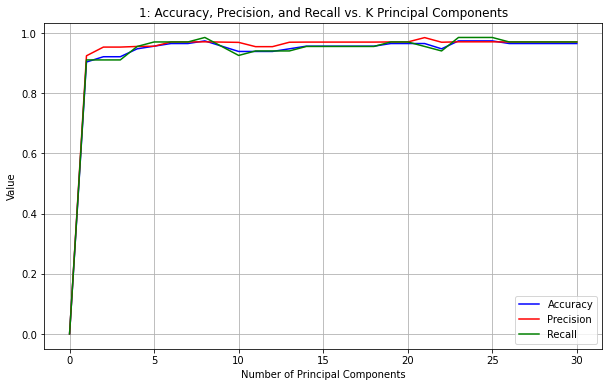

In [277]:
plt.plot(range(0, 31), accuracyHistory, color = 'blue', label = 'Accuracy')
plt.plot(range(0, 31), precisionHistory, color = 'red', label = 'Precision')
plt.plot(range(0, 31), recallHistory, color = 'green', label = 'Recall')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Principal Components') 
plt.ylabel('Value') 
plt.title('1: Accuracy, Precision, and Recall vs. K Principal Components') 
plt.legend()

In [278]:
#
#
# Problem 1b: SVC Kernel Tricks w/ Optimum K=8 PCA Extraction
#
#
pca = PCA(n_components=8)                   
principalComps = pca.fit_transform(stdX)  
    
np.random.seed(0) 
trainX, validX, trainY, validY = train_test_split(principalComps, Y, test_size = 0.2, random_state=0)
    
classifier = SVC(kernel='poly', C=50) #Kernel: poly
classifier.fit(trainX, trainY)
    
predictedY = classifier.predict(validX)
    
accuracy = metrics.accuracy_score(validY, predictedY)
print('Poly Trick Accuracy:', accuracy)

Poly Trick Accuracy: 0.9736842105263158


In [279]:
#Kernel: RBF
pca = PCA(n_components=8)                   
principalComps = pca.fit_transform(stdX)  
    
np.random.seed(0) 
trainX, validX, trainY, validY = train_test_split(principalComps, Y, test_size = 0.2, random_state=0)
    
classifier = SVC(kernel='rbf', C=50) 
classifier.fit(trainX, trainY)
    
predictedY = classifier.predict(validX)
    
accuracy = metrics.accuracy_score(validY, predictedY)
print('RBF Trick Accuracy:', accuracy)

RBF Trick Accuracy: 0.9649122807017544


In [280]:
#Kernel: Sigmoid
pca = PCA(n_components=8)                   
principalComps = pca.fit_transform(stdX)  
    
np.random.seed(0) 
trainX, validX, trainY, validY = train_test_split(principalComps, Y, test_size = 0.2, random_state=0)
    
classifier = SVC(kernel='sigmoid', C=50) 
classifier.fit(trainX, trainY)
    
predictedY = classifier.predict(validX)
    
accuracy = metrics.accuracy_score(validY, predictedY)
print('Sigmoid Trick Accuracy:', accuracy)

Sigmoid Trick Accuracy: 0.8859649122807017


In [281]:
#
#
# Problem 2a: Housing SVR Model 
#
#
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [282]:
# Map yes and no variables to binary values
varsList = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes':1, 'no':0})

housing[varsList] = housing[varsList].apply(binary_map)
print(housing.shape)
housing.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [283]:
# Get necessary features for problem
area = housing.values[:,1]       
areaT = area.reshape(len(housing), 1)

bed = housing.values[:,2]
bedT = bed.reshape(len(housing), 1)

bath = housing.values[:,3]
bathT = bath.reshape(len(housing) , 1)

stories = housing.values[:,4]
storiesT = stories.reshape(len(housing) , 1)

mainroad = housing.values[:,5]
mainroadT = mainroad.reshape(len(housing) , 1)

guest = housing.values[:,6]
guestT = guest.reshape(len(housing) , 1)

base = housing.values[:,7]
baseT = base.reshape(len(housing) , 1)

hotwater = housing.values[:,8]
hotwaterT = hotwater.reshape(len(housing) , 1)

aircon = housing.values[:,9]
airconT = aircon.reshape(len(housing) , 1)

parking = housing.values[:,10]
parkingT = parking.reshape(len(housing) , 1)

prefarea = housing.values[:,11]
prefareaT = prefarea.reshape(len(housing) , 1)

X = np.hstack((areaT,bedT,bathT,storiesT,mainroadT,guestT,baseT,hotwaterT,airconT,parkingT,prefareaT))
print('X data:', X[:5])
print(X.shape)

X data: [[7420 4 2 3 1 0 0 0 1 2 1]
 [8960 4 4 4 1 0 0 0 1 3 0]
 [9960 3 2 2 1 0 1 0 0 2 1]
 [7500 4 2 2 1 0 1 0 1 3 1]
 [7420 4 1 2 1 1 1 0 1 2 0]]
(545, 11)


In [284]:
# Get Y data
price = housing.values[:,0]
Y = price.reshape(len(housing), 1)
print('Y data:', Y[:5])
print(Y.shape)

Y data: [[13300000]
 [12250000]
 [12250000]
 [12215000]
 [11410000]]
(545, 1)


In [285]:
# Split standardized data
np.random.seed(0) 
trainX, validX, trainY, validY = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(trainX[:5])
print(trainY[:5])

[[3620 2 1 1 1 0 0 0 0 0 0]
 [4000 2 1 1 1 0 0 0 0 0 0]
 [3040 2 1 1 0 0 0 0 0 0 0]
 [3600 2 1 1 1 0 0 0 0 0 0]
 [9860 3 1 1 1 0 0 0 0 0 0]]
[[1750000]
 [2695000]
 [2870000]
 [2590000]
 [4515000]]


In [286]:
# Standardize training data
stdTrainX = standard.fit_transform(trainX)
print(stdTrainX[:5])
stdTrainY = standard.fit_transform(trainY)
print(stdTrainY[:5])

[[-0.71677205 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.53893631 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.98820554 -1.29437561 -0.57330726 -0.93314164 -2.52781141 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.72613182 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [ 2.20347795  0.05251643 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]]
[[-1.5860012 ]
 [-1.09097091]
 [-0.99929863]
 [-1.14597428]
 [-0.13757923]]


In [287]:
# Standardize validation data
stdValidX = standard.fit_transform(validX)
print(stdValidX[:5])
stdValidY = standard.fit_transform(validY)
print(stdValidY[:5])

[[-0.50073521  0.02560738 -0.56354451  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902 -0.63042517  0.49214421 -0.48850421]
 [ 1.95422869  0.02560738 -0.56354451 -0.91531729  0.44474959 -0.47404546
   1.12731244 -0.28143902 -0.63042517  1.73967255  2.04706526]
 [-0.73662142  1.42120937 -0.56354451  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902  1.58623108 -0.75538413 -0.48850421]
 [ 3.5180669  -1.36999462 -0.56354451 -0.91531729  0.44474959 -0.47404546
   1.12731244  3.5531676  -0.63042517  0.49214421 -0.48850421]
 [-0.64925616  1.42120937 -0.56354451  0.27241586 -2.24845626 -0.47404546
  -0.88706553 -0.28143902 -0.63042517 -0.75538413 -0.48850421]]
[[-0.08135801]
 [ 0.80111439]
 [-0.42156349]
 [ 1.30008243]
 [-1.05042817]]


In [288]:
# Build and test SVR
from sklearn.svm import SVR

svrRBF = SVR(kernel='linear', C=50)
svrRBF.fit(stdTrainX, stdTrainY)

predictedY = svrRBF.predict(stdValidX)

MSE = metrics.mean_squared_error(stdValidY, predictedY)
print('MSE:', MSE)

MSE: 0.32973457591278266


In [289]:
#
#
# Problem 2b: Optimum K Calculation
#
#

stdX = standard.fit_transform(X)
print(stdX.shape)
stdX[:5]

(545, 11)


array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  0.40562287,
        -0.46531479, -0.73453933, -0.2192645 ,  1.4726183 ,  1.51769249,
         1.80494113],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  0.40562287,
        -0.46531479, -0.73453933, -0.2192645 ,  1.4726183 ,  2.67940935,
        -0.55403469],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  0.40562287,
        -0.46531479,  1.3613975 , -0.2192645 , -0.67906259,  1.51769249,
         1.80494113],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  0.40562287,
        -0.46531479,  1.3613975 , -0.2192645 ,  1.4726183 ,  2.67940935,
         1.80494113],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  0.40562287,
         2.14908276,  1.3613975 , -0.2192645 ,  1.4726183 ,  1.51769249,
        -0.55403469]])

In [290]:
stdY = standard.fit_transform(Y)
print(stdY.shape)
stdY[:5]

(545, 1)


array([[4.56636513],
       [4.00448405],
       [4.00448405],
       [3.98575468],
       [3.55497918]])

In [295]:
MSE = np.zeros(11)
for i in range(1,11):
    pca = PCA(n_components=i)                   #reduce to i number of components/variables
    principalComps = pca.fit_transform(stdX)    #feed stdized x data to get i principal components
    
    np.random.seed(0) #split new components and Y datas into training and validation sets
    trainX, validX, trainY, validY = train_test_split(principalComps, stdY, test_size = 0.2, random_state=0)
    
    svrRBF = SVR(kernel='linear', C=50)
    svrRBF.fit(trainX, trainY)
    
    predictedY = svrRBF.predict(validX) #predict result based on classifier
    
    MSE[i] = metrics.mean_squared_error(validY, predictedY)
    
    print('K=', i, ':', MSE[i])

K= 1 : 0.28587907354486886
K= 2 : 0.280713148446097
K= 3 : 0.2798957726451985
K= 4 : 0.2793303496141157
K= 5 : 0.28824468885940624
K= 6 : 0.2874300333131442
K= 7 : 0.3040672061485935
K= 8 : 0.3012286810039125
K= 9 : 0.2876644198834219
K= 10 : 0.2874609988750934


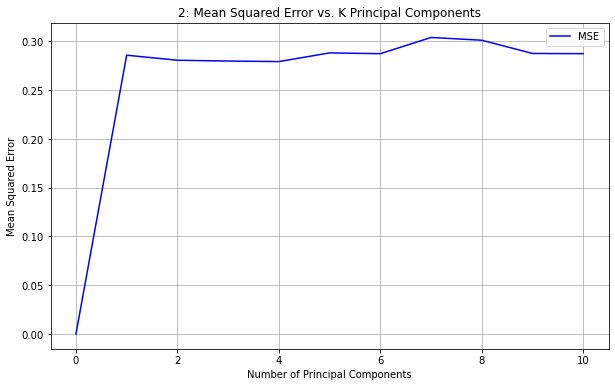

In [299]:
plt.plot(range(0, 11), MSE, color = 'blue', label='MSE')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Principal Components') 
plt.ylabel('Mean Squared Error') 
plt.title('2: Mean Squared Error vs. K Principal Components') 
plt.legend()

In [300]:
#
#
# Problem 2c: SVR Kernel Tricks w/ Optimum K=4 PCA Extraction
#
#
pca = PCA(n_components=4)                   
principalComps = pca.fit_transform(stdX)  
    
np.random.seed(0) 
trainX, validX, trainY, validY = train_test_split(principalComps, stdY, test_size = 0.2, random_state=0)
    
svrPoly = SVR(kernel='poly', C=50) # Kernel: poly
svrPoly.fit(trainX, trainY)
    
predictedY = svrPoly.predict(validX)

MSE = metrics.mean_squared_error(validY, predictedY)
print('Poly Trick MSE:', MSE)

Poly Trick MSE: 0.5518735909436466


In [301]:
# Kernel: RBF
pca = PCA(n_components=4)                   
principalComps = pca.fit_transform(stdX)  
    
np.random.seed(0) 
trainX, validX, trainY, validY = train_test_split(principalComps, stdY, test_size = 0.2, random_state=0)
    
svrRBF = SVR(kernel='rbf', C=50) 
svrRBF.fit(trainX, trainY)
    
predictedY = svrRBF.predict(validX)

MSE = metrics.mean_squared_error(validY, predictedY)
print('RBF Trick MSE:', MSE)

RBF Trick MSE: 0.46499151364498814


In [302]:
# Kernel: Sigmoid
pca = PCA(n_components=4)                   
principalComps = pca.fit_transform(stdX)  
    
np.random.seed(0) 
trainX, validX, trainY, validY = train_test_split(principalComps, stdY, test_size = 0.2, random_state=0)
    
svrSig = SVR(kernel='sigmoid', C=50) 
svrSig.fit(trainX, trainY)
    
predictedY = svrSig.predict(validX)

MSE = metrics.mean_squared_error(validY, predictedY)
print('Sigmoid Trick MSE:', MSE)

Sigmoid Trick MSE: 87265.88370715863
